1/1 [==============================] - 2s 2s/step
Classified as: banana
Probability: 0.9991266
1/1 [==============================] - 0s 31ms/step


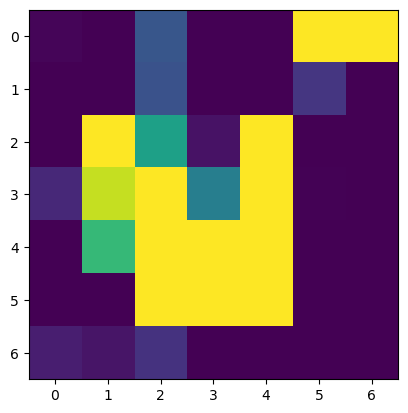

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 載入模型
model_path = 'C:/Data/myimageresnet101_fruits10.h5'
model = tf.keras.models.load_model(model_path)

# 定義新的全連接層
fc1_new = tf.keras.layers.Dense(512, activation='relu', name='fc1_new')#(concat_new)
fc2_new = tf.keras.layers.Dense(10, activation='softmax', name='fc2_new')#(fc1_new)

# 建立新模型
input_new = tf.keras.Input(shape=(224,224,3), name='input_new')
x = model.layers[-4](input_new)  # 使用模型的倒數第4層作為新模型的輸入層
x = fc1_new(x)
output_new = fc2_new(x)
model_new = tf.keras.models.Model(inputs=input_new, outputs=output_new)


# 定義反卷積模型
def get_deconv_model(model, layer_name):
    # 取得指定層的輸出張量
    output_tensor = model.get_layer(layer_name).output
    
    # 建立反卷積模型
    deconv_input = tf.keras.Input(shape=output_tensor.shape[1:])
    deconv_output = deconv_input
    for layer in model.layers[::-1]:
        if "Conv2DTranspose" in str(layer.__class__):
            deconv_output = layer(deconv_output)
        elif "Conv2D" in str(layer.__class__):
            conv_layer = model.get_layer(layer.name)
            deconv_output = conv_layer.backward(deconv_output)
    deconv_model = tf.keras.models.Model(inputs=deconv_input, outputs=deconv_output)
    return deconv_model


from tensorflow.keras.preprocessing import image

# 載入模型
model_path = 'C:/Data/myimageresnet101_fruits10.h5'
model = tf.keras.models.load_model(model_path)

# 定義類別標籤
class_labels = ['apple', 'banana', 'cherry', 'grape', 'kiwi', 'lemon', 'orange', 'peach', 'pear', 'pineapple']

# 載入待預測的影像
img_path = 'C:/Data/myimage/apple/2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 預測影像的類別機率
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_prob = preds[0][class_idx]

# 顯示預測結果
print('Classified as:', class_labels[class_idx])
print('Probability:', class_prob)


# 定義要可視化的圖片
img_path = 'C:/Data/myimage/apple/2.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet.preprocess_input(x)

# 前傳圖片，並取得最後一層 conv5_block3_out 的 feature map
feature_map = model_new.predict(x)
last_feature_map = feature_map[0][:,:,2]

# 將 feature map 轉換為 4D tensor 以供反卷積模型使用
last_feature_map = np.expand_dims(last_feature_map, axis=2)
last_feature_map = np.expand_dims(last_feature_map, axis=0)

# 建立反卷積模型
deconv_model = get_deconv_model(model_new, 'conv5_block3_out')

# 將輸入形狀調整為預期的形狀
last_feature_map_resized = tf.image.resize(last_feature_map, (7, 7))

# 反卷積，並取得可視化的結果
deconv_result = deconv_model.predict(last_feature_map_resized)
deconv_result = np.squeeze(deconv_result, axis=0)

# 顯示可視化的結果
plt.imshow(deconv_result)
plt.show()

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 載入模型
model_path = 'C:/Users/user/carlogo10vgg16_carlogo10.h5'
model = tf.keras.models.load_model(model_path)

# 定義新的全連接層
fc1_new = tf.keras.layers.Dense(512, activation='relu', name='fc1_new')#(concat_new)
fc2_new = tf.keras.layers.Dense(10, activation='softmax', name='fc2_new')#(fc1_new)

# 建立新模型
input_new = tf.keras.Input(shape=(224,224,3), name='input_new')
x = model.layers[-4](input_new)  # 使用模型的倒數第4層作為新模型的輸入層
x = fc1_new(x)
output_new = fc2_new(x)
model_new = tf.keras.models.Model(inputs=input_new, outputs=output_new)


# 定義反卷積模型
def get_deconv_model(model, layer_name):
    # 取得指定層的輸出張量
    output_tensor = model.get_layer(layer_name).output
    
    # 建立反卷積模型
    deconv_input = tf.keras.Input(shape=output_tensor.shape[1:])
    deconv_output = deconv_input
    for layer in model.layers[::-1]:
        if "Conv2DTranspose" in str(layer.__class__):
            deconv_output = layer(deconv_output)
        elif "Conv2D" in str(layer.__class__):
            conv_layer = model.get_layer(layer.name)
            deconv_output = conv_layer.backward(deconv_output)
    deconv_model = tf.keras.models.Model(inputs=deconv_input, outputs=deconv_output)
    return deconv_model


from tensorflow.keras.preprocessing import image

# 載入模型
model_path = 'C:/Users/user/carlogo10vgg16_carlogo10.h5'
model = tf.keras.models.load_model(model_path)

# 定義類別標籤
class_labels = ['Audi', 'BMW', 'Fiat', 'Ford', 'Honda', 'mazda', 'mercedes', 'Nissan', 'Toyota', 'volkswagon']

# 載入待預測的影像
img_path = 'C:/carlogodata_test_10/BMW/06.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 預測影像的類別機率
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_prob = preds[0][class_idx]

# 顯示預測結果
print('Classified as:', class_labels[class_idx])
print('Probability:', class_prob)

1/1 [==============================] - 0s 425ms/step
Classified as: BMW
Probability: 1.0


1/1 [==============================] - 1s 1s/step


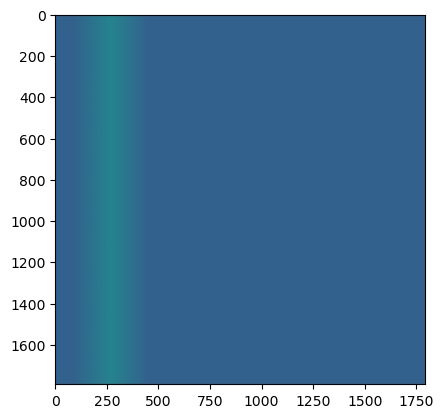

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_deconv_model(model, target_layer):
    # Create a new model that outputs the target layer's activations
    layer_outputs = [layer.output for layer in model.layers if layer.name == target_layer]
    activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
    
    # Create a model that applies the deconvolution layers to the target layer's activations
    deconv_model = tf.keras.models.Sequential()
    deconv_model.add(tf.keras.layers.InputLayer(input_shape=layer_outputs[0].shape[1:]))
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            deconv_model.add(tf.keras.layers.Conv2DTranspose(
                filters=layer.filters,
                kernel_size=layer.kernel_size,
                strides=layer.strides,
                padding=layer.padding,
                activation='relu'
            ))
        elif isinstance(layer, tf.keras.layers.MaxPooling2D):
            deconv_model.add(tf.keras.layers.UpSampling2D(size=layer.pool_size))
    return deconv_model

# 定義要可視化的圖片
img_path = 'C:/carlogodata_test_10/BMW/06.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)

# 前傳圖片，並取得最後一層 block5_pool 的 feature map
feature_map = model.predict(x)
last_feature_map = feature_map[0][:]

# 將 feature map 轉換為 4D tensor 以供反卷積模型使用
last_feature_map = np.expand_dims(last_feature_map, axis=1)
last_feature_map = np.expand_dims(last_feature_map, axis=0)

# 建立反卷積模型
deconv_model = get_deconv_model(model, 'block5_pool')

# 將輸入形狀調整為預期的形狀
last_feature_map_resized = tf.image.resize(last_feature_map, (224, 224))
last_feature_map_resized = tf.expand_dims(last_feature_map_resized, axis=0)

# 反卷積，並取得可視化的結果
deconv_model = tf.keras.Sequential()
deconv_model.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same'))
deconv_model.add(tf.keras.layers.ReLU())
deconv_model.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same'))
deconv_model.add(tf.keras.layers.ReLU())
deconv_model.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same'))
deconv_model.add(tf.keras.layers.ReLU())
deconv_model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same'))
deconv_result = deconv_model.predict(last_feature_map_resized)
deconv_result = np.squeeze(deconv_result, axis=0)

# 顯示可視化的結果
plt.imshow(deconv_result)
plt.show()